<a href="https://colab.research.google.com/github/DarellTimothy/DataScience-ML/blob/main/ML_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Buat akses google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Library and Dataset Preparation**

In [ ]:
# Data manipulation library
import numpy as np
import pandas as pd

# Data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# z-score function from statistics library
from scipy import stats

# ML Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

# Konfigurasi plot
rcParams['figure.figsize'] = (10, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load dataset (Ubah parameternya yaa tergantung lokasi dataset masing-masing)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rakamin Assignments/Machine Learning Preparation/Product_Exclusive_Classification.csv')

In [ ]:
# Pemisahan tipe data menjadi categorical dan numerical (Mengambil nama kolom saja untuk subsetting nantinya)
cats = ['brand', 'category']
nums = list(df.select_dtypes(include = ['number']))

# ID tidak memberikan informasi apapun yang insightful, sehingga kita remove dari list nama kolom 'nums'
nums = nums[1:]

## **No 1: Descriptive Statistics**

Gunakan function `info` dan `describe` pada dataset homework. Tuliskan hasil observasinya, seperti:

1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

*Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah, misal untuk A: “Semua tipe data sudah sesuai”*

In [ ]:
# Mengecek dataset
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


In [ ]:
# Mengecek nama kolom, tipe kolom, dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


Kolom `id` lebih baik berbentuk string agar tidak termasuk ke numerical summary statistics karena tidak terlalu berguna dalam numerical summary statistics

In [ ]:
# Mengubah kolom 'id' dari int64 menjadi string
df['id'] = df['id'].astype('str')

# Mengecek perubahan jenis kolom `id`
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   object 
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 562.6+ KB


**A. Hanya kolom `id` yang perlu diubah dari integer ke string**

In [ ]:
# Memeriksa unique values pada kolom categorical `brand` dan `category`
for i in cats:
    print(f'Total nilai unik pada {i} :')
    print(df[i].value_counts())
    print()

Total nilai unik pada brand :
SEPHORA COLLECTION    492
CLINIQUE              211
TOM FORD              150
tarte                 143
Kiehl's Since 1851    122
                     ... 
Conture                 1
Cocofloss               1
Makeup Eraser           1
Flora + Bast            1
SHHHOWERCAP             1
Name: brand, Length: 310, dtype: int64

Total nilai unik pada category :
Perfume                  619
Moisturizers             395
Face Serums              334
Value & Gift Sets        241
Face Wash & Cleansers    225
                        ... 
Powder Brush               1
Accessories                1
Lid Shadow Brush           1
Spa Tools                  1
Cleansing Brushes          1
Name: category, Length: 142, dtype: int64



In [ ]:
# Mengecek jumlah dan proposi missing values pada tiap kolom
missing_counts = df.isnull().sum()
missing_percent = (missing_counts /(len(df)) * 100).round(2)

missing_data = pd.DataFrame({
    'MissingCount' : missing_counts,
    'MissingPercent': missing_percent.astype(str) + '%'
})

missing_data.reset_index().rename(columns = {'index':'Kolom'})

,Kolom,MissingCount,MissingPercent
0,id,0,0.0%
1,brand,0,0.0%
2,category,13,0.16%
3,rating,95,1.19%
4,number_of_reviews,9,0.11%
5,love,34,0.43%
6,price,8,0.1%
7,value_price,17,0.21%
8,exclusive,0,0.0%


**B. Ada missing values pada kolom:**
1. `category`
2. `rating`
3. `number_of_reviews`
4. `love`
5. `price`
6. `value_price`

In [ ]:
# Pemisahan tipe data menjadi categorical dan numerical (Mengambil nama kolom saja untuk subsetting nantinya)
cats = ['id', 'brand', 'category']
nums = list(df.select_dtypes(include = ['number']))

In [ ]:
# Mengecek summary statistics kolom bertipe numerical
df[nums].describe()

,rating,number_of_reviews,love,price,value_price,exclusive
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [ ]:
# Mengecek summary statistics kolom bertipe categorical
df[cats].describe()

,id,brand,category
count,8000,8000,7987
unique,7951,310,142
top,1723881,SEPHORA COLLECTION,Perfume
freq,2,492,619


**C. Ada beberapa kolom yang summary statisticsnya menarik perhatian**

- Statistik max pada kolom `number_of_reviews`, `love`, `price` dan `value_price` memiliki selisih nilai yang sangat jauh dari nilai mediannya
- Terdapat `id` yang terduplikasi karena jumlah unique nya tidak sesuai dengan jumlah baris pada dataset

In [ ]:
# Menghapus `id` dari list cats karena tidak digunakan untuk EDA
cats = cats[1:]

## **No 2: Univariate Analysis**

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target).

Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb).

*Jelaskan juga apa yang harus di-follow up saat data pre-processing.*

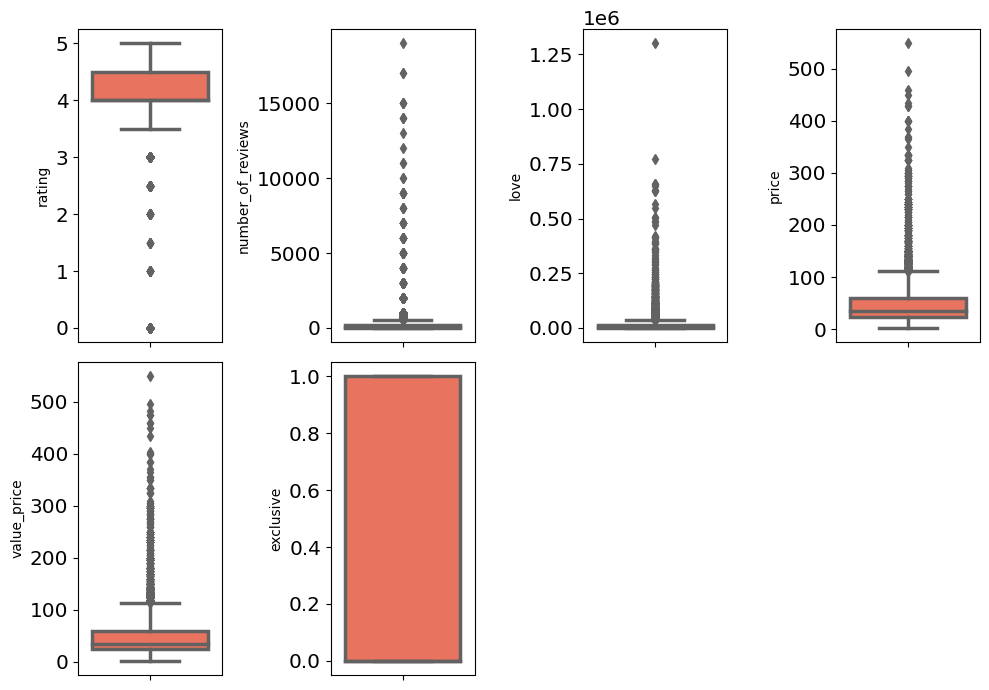

In [ ]:
# Memeriksa distribusi setiap kolom numerical dengan boxplot
for i in range (0, len(nums)):
  plt.subplot(2,4, i+1)
  sns.boxplot(y=df[nums[i]], color = 'Tomato', orient = 'v')
  plt.tight_layout()

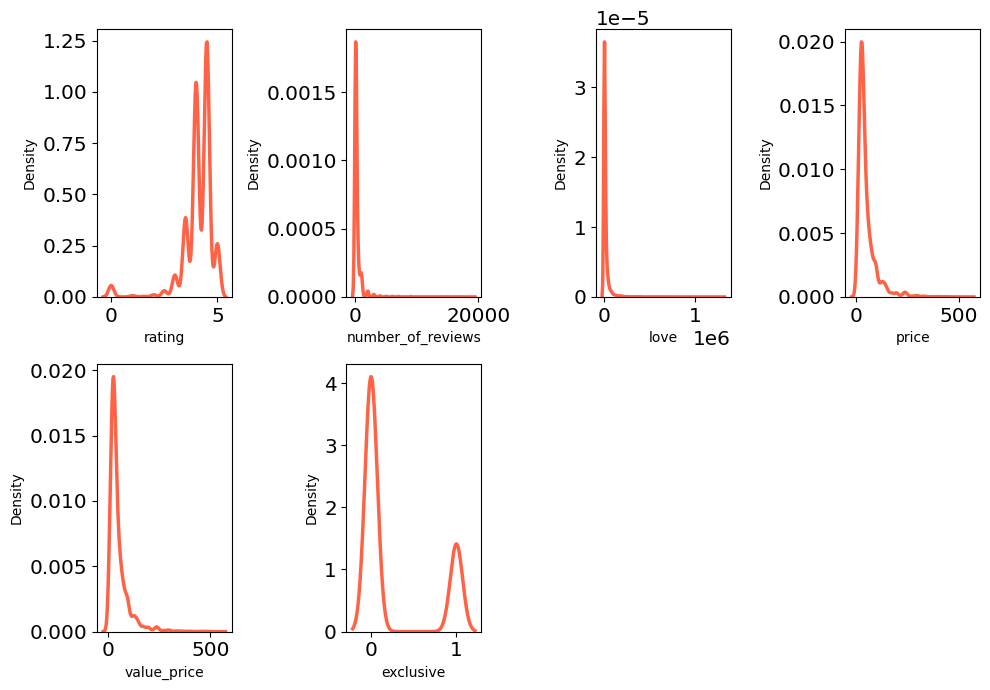

In [ ]:
# Memeriksa distribusi setiap kolom numerical dengan kde plot
for i in range (0, len(nums)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x=df[nums[i]], color = 'Tomato')
  plt.tight_layout()

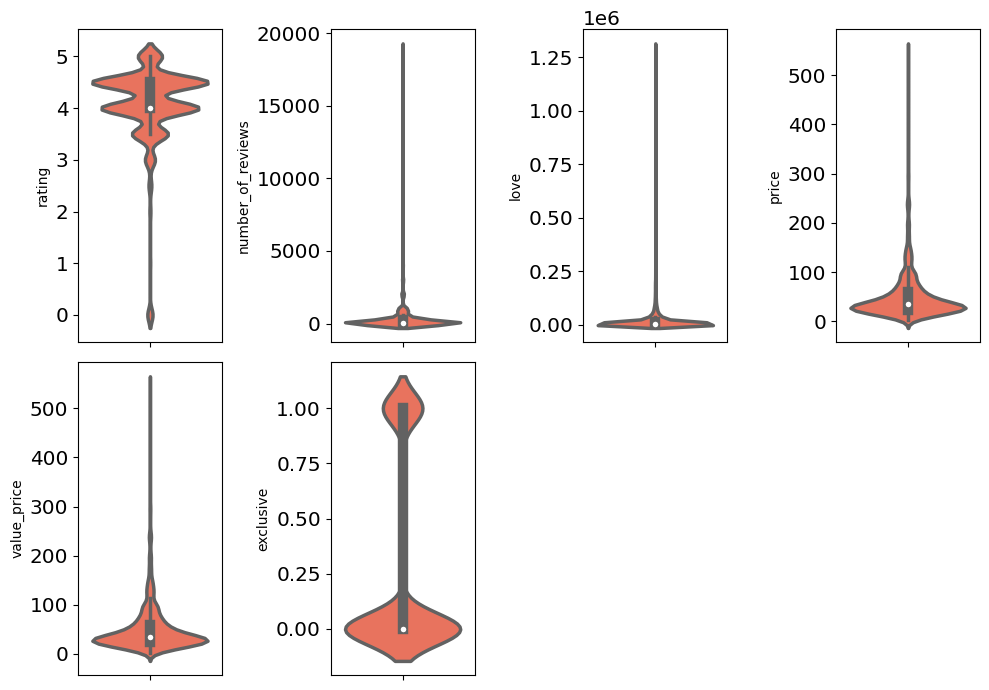

In [ ]:
# Memeriksa distribusi setiap kolom numerical dengan violin plot
for i in range(0, len(nums)):
  plt.subplot(2, 4, i+1)
  sns.violinplot(y=df[nums[i]], color='Tomato')
  plt.tight_layout()

**Kesimpulan dari Observasi visualisasi data diatas:**


*   Data pada kolom `rating` memiliki janis data negatively skewed. Kita bisa menggunakan teknik transformasi Yeo-Johnson. Tapi karena belum ada pada materi, kita akan menggunakan teknik MinMaxScaler().

*   Data pada kolom `number_of_review`, `love`, `price`, dan `value_price` memiliki jenis data positively skewed. Data ini akan dirubah transformasi log distribusinya menjadi berbentuk distribusi normal (lalu di scaling).

*   `exclusive` (Target) terdapat class imbalance data (data minoritas kurang dari 20%). Kita akan melakukan imbalance handling nantinya. Untuk menghilangkan masalah class imbalance, kita akan melakukan imbalance handling pada tahap pre-processing.

## **No 3: Multivariate Analysis**

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:

1. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
2. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?


*Tuliskan juga jika memang tidak ada feature yang saling berkorelasi*

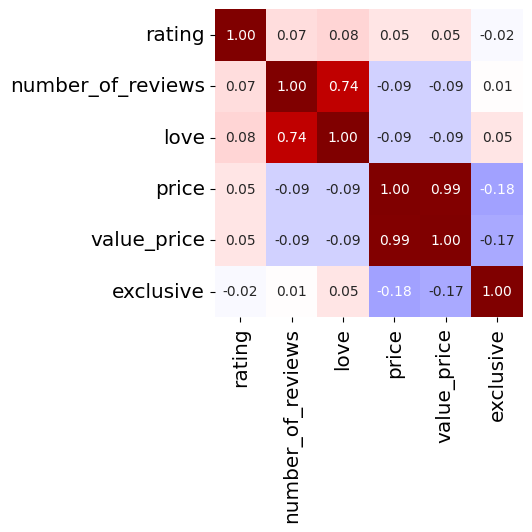

In [ ]:
# Mengecek korelasi antar kolom numerical dengan correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(df[nums].corr(),
            square=True, cmap='seismic', cbar=False, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

* Dari plotting heatmap didapatkan feature yang memiliki nilai korelasi tinggi terdapat pada pasangan feature `number_of_reviews` -- `love` dan `price` -- `value_price`.
* Analisis selanjutnya akan menggunakan feature `love` karena memiliki korelasi lebih tinggi dengan target 'exclusive'
* Sedangkan untuk `price` dan `value_price` akan menggunakan feature `price` karena memiliki korelasi dengan target yang lebih tinggi.

<Figure size 1500x1500 with 0 Axes>

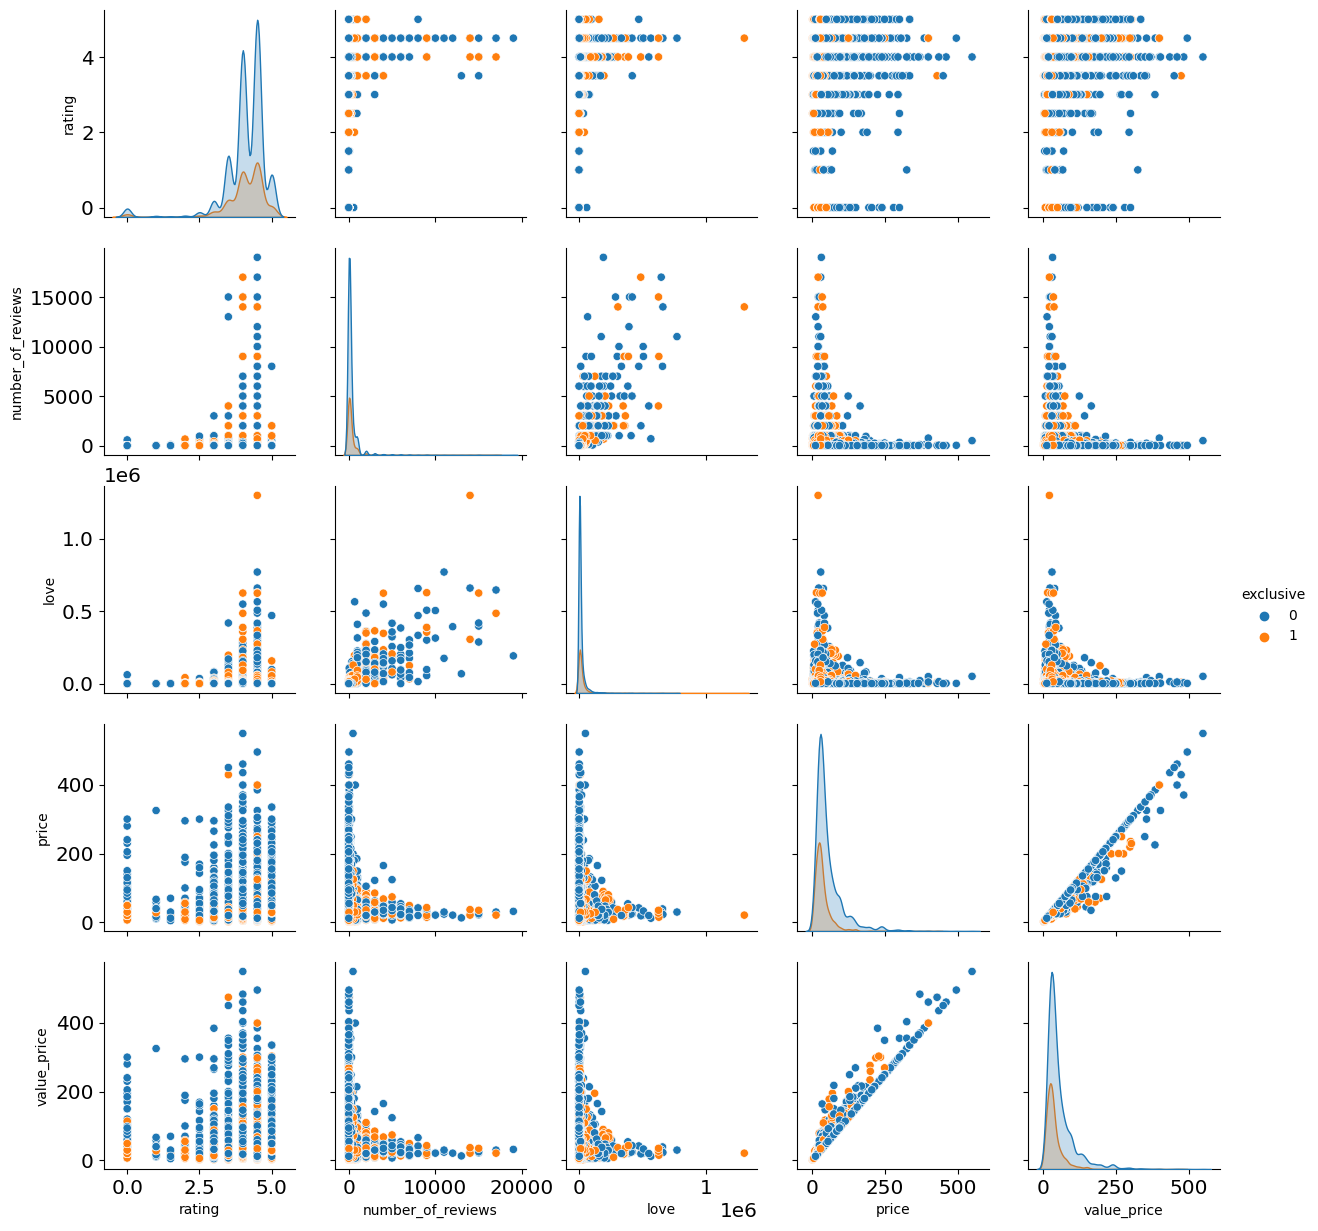

In [ ]:
# Mengecek hubungan antar kolom dengan pair plot
plt.figure(figsize=(15, 15))
sns.pairplot(df[nums], diag_kind='kde', hue = 'exclusive')
plt.show()

* Korelasi antar feature tidak memiliki pola menarik/khusus yang dapat digunakan sebagai insight.
* Sama seperti dengan hasil heatmap, data feature yang memiliki trend yang baik adalah pasangan dari feature number_of_reviews -- love dan price -- value_price.

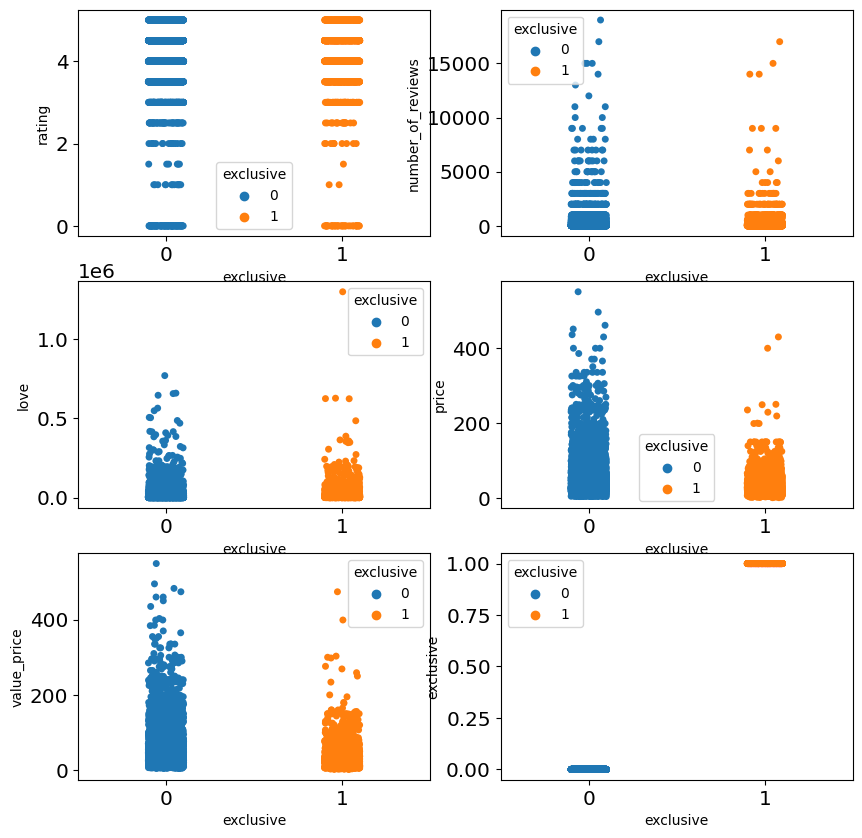

In [ ]:
# Mengecek hubungan fitur dan target dengan strip plot
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3,2, i+1)
    sns.stripplot(ax=ax, data=df, x='exclusive', y=nums[i], hue= 'exclusive')
plt.show()

Berdasarkan plotting beberapa feature dengan feature exclusive didapatkan beberapa insight:

* Tingginya rating suatu produk tidak memengaruhi nilai apakah produk tersebut exclusive atau tidak. Hal ini juga dapat dilihat dari nilai korelasi pada heatmap plot dimana keduanya tidak memiliki nilai korelasi tinggi. Namun, berdasarkan stripplot dapat dilihat bahwa produk exclusive cenderung memiliki rating di atas 2.
* Untuk feature price, terlihat bahwa produk exclusive memiliki harga cenderung lebih rendah dari produk tidak eksklusif.

Karena categorical features memiliki cardinality yang tinggi, kita akan menggunakan top 20 unique values dengan frekuensi terbanyak dan mengkategorikan sisanya menjadi `others`

In [ ]:
# Top 20 'brand'
viz_df = df.copy()

top_20_brand = viz_df['brand'].value_counts().nlargest(20).index
viz_df['brand'] = viz_df['brand'].apply(lambda x : x if x in top_20_brand else 'Others')

# Top 20 'category'
top_20_category = viz_df['category'].value_counts().nlargest(20).index
viz_df['category'] = viz_df['category'].apply(lambda x : x if x in top_20_category else 'Others')

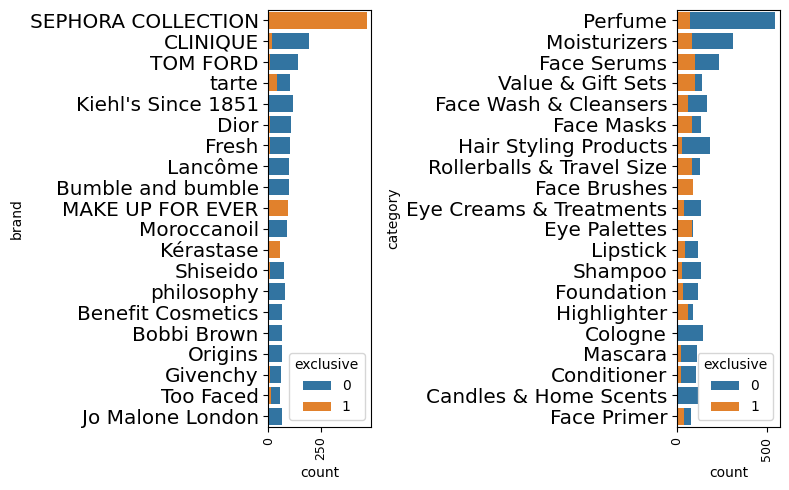

In [ ]:
# Vertical countplot
plt.figure(figsize = (8, 5))
for col in range(0, len(cats)):
    plt.subplot(1, 2, col + 1)
    sns.countplot(y = viz_df[cats[col]], order = viz_df[cats[col]].value_counts().index[1:], hue = viz_df['exclusive'],
                  dodge = False, orient = 'h')
    plt.xticks(rotation = 90, size = 9)
    plt.legend(loc = 'lower right', title = 'exclusive')
    plt.tight_layout()

Fitur categorical `brand` dan `category` memiliki proporsi target `exclusive` yang berbeda beda pada tiap unique values, sehingga ada indikasi jika `brand` dan `category` memiliki hubungan dengan target `exclusive`

***QUESTIONS***

1. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
2. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

***ANSWERS***


1.   Feature yang paling relevan untuk dipertahankan:
*   brand dan category: karena setiap `brand` & `category` memiliki proporsi target yang berbeda.
*   rating: Produk `exclusive` cenderung memiliki rating tinggi.
*   price: Produk `exclusive` cenderung memiliki price rendah.
*   love: Diasumsikan target `exclusive` memiliki nilai `love` yang tinggi.
2.   Tidak ada pola menarik/khusus.

## **No 4: Data Cleaning**

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:
1. Handle missing values
2. Handle duplicated data
3. Handle outliers
4. Feature transformation
5. Feature encoding
6. Handle class imbalance

Di laporan homework (PPT), tuliskan apa saja yang telah dilakukan dan metode yang digunakan.

*Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”).*

### Missing Value Handling

In [ ]:
# Memeriksa jumlah missing values
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [ ]:
# Kalkulasi persentase missing values pada tiap kolom
round(df.isna().mean()*100, 2)

id                   0.00
brand                0.00
category             0.16
rating               1.19
number_of_reviews    0.11
love                 0.43
price                0.10
value_price          0.21
exclusive            0.00
dtype: float64

Semua kolom memiliki proporsi < 1,19% missing values. Kita dapat membuang beberapa observasi pada kolom dengan jumlah missing values yang kecil, yaitu:
1. `number_of_reviews`
2. `price`

Sisanya dapat dilakukan imputasi:
1. `category` dengan mode
2. `rating` dengan median (karena berdistribusi left-skewed)
3. `love` dengan median (karena berdistribusi right-skewed)
4. `value_price` dengan median (karena berdistribusi right-skewed)

In [ ]:
# Membuang missing values pada kolom `number_of_reviews` dan `price`
df.dropna(subset = ['number_of_reviews', 'price'], inplace = True)

In [ ]:
# Imputasi missing values pada kolom `category`, `rating`, `love`, dan `value_price`
df['category'].fillna(df['category'].mode()[0], inplace = True)
df['rating'].fillna(df['rating'].median(), inplace = True)
df['love'].fillna(df['love'].median(), inplace = True)
df['value_price'].fillna(df['value_price'].median(), inplace = True)

In [ ]:
# Memeriksa ulang jumlah missing values
df.isna().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

### Duplicates Handling

In [ ]:
# Memeriksa data duplikat
df.duplicated().sum()

0

### Outlier Handling

Ada 2 metode yang telah diajarkan untuk handling outlier, yaitu menggunakan metode:
1. z-score
2. IQR

Kedua metode ini akan bergantung pada sifat data yang kita miliki, z-score lebih akurat jika digunakan pada data yang berdistribusi mendekati normal (Gaussian) karena z-score menggunakan rata-rata dan standard devation yang sifatnya sensitif terhadap outlier.

Sedangkan IQR merupakan metode alternatif apabila data memiliki bentuk distribusi *skewed* dan outlier yang cukup ekstrim

Pada bagian ini, kita akan melakukan *benchmarking* kedua metode tersebut untuk menentukan metode mana yang handling outlier dengan baik

### z-score

In [ ]:
# z-score removal
df3 = df.copy()
print(f"Jumlah baris sebelum outlier handling (z-score): {len(df3)}")

filtered_entries = np.array([True] * len(df3))

for i in nums:
    z_score = abs(stats.zscore(df3[i]))
    filtered_entries = (z_score < 3) & filtered_entries

df3 = df3[filtered_entries]

print(f"Jumlah baris setelah outlier handling (z-score): {len(df3)}")

Jumlah baris sebelum outlier handling (z-score): 7983
Jumlah baris setelah outlier handling (z-score): 7458


Kita akan membandingkan distribusi data dengan boxplot untuk data original dengan data yang telah dilakukan outlier handling menggunakan metode z-score

**DATA ORIGINAL DENGAN OUTLIER**

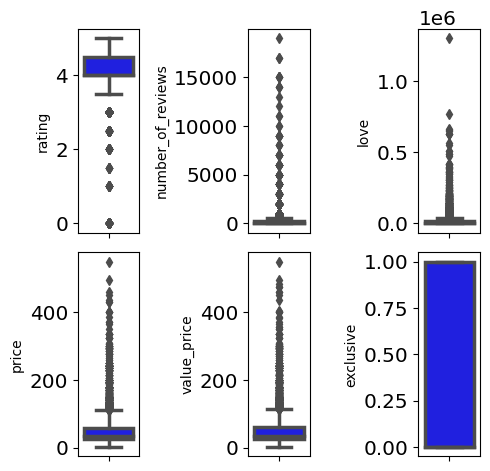

In [ ]:
# Membuat boxplot
plt.figure(figsize = (5, 7))
for col in range(0, len(nums)):
    plt.subplot(3, 3, col + 1)
    sns.boxplot(y = df[nums[col]], color = 'blue')
    plt.tight_layout()

plt.show()

**DATASET ORIGINAL DENGAN OUTLIER HANDLING (z-score METHOD)**

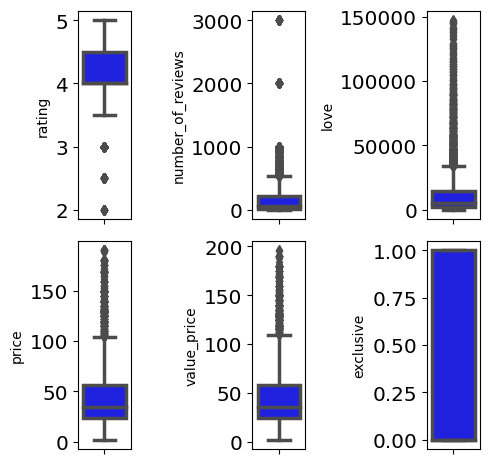

In [ ]:
# Membuat subplot
plt.figure(figsize = (5, 7))
for col in range(0, len(nums)):
    plt.subplot(3, 3, col + 1)
    sns.boxplot(y = df3[nums[col]], color = 'blue')
    plt.tight_layout()

plt.show()

Metode z-score berhasil menghilangkan sebagian dari outlier, meskipun tidak semuanya. Hal ini mungkin disebabkan oleh sensitivitas z-score terhadap outlier itu sendiri dan asumsinya bahwa data mengikuti distribusi yang mendekati normal. Meskipun hanya 7% data yang dihilangkan, kemunculan beberapa global outlier yang tersisa menimbulkan pertanyaan apakah hal ini dapat mempengaruhi akurasi model. Untuk menjawab pertanyaan ini, kami akan mengeksplorasi metode IQR sebagai pendekatan alternatif.

### IQR

In [ ]:
# Using iqr
df2 = df.copy()

print(f"Jumlah baris sebelum outlier handling (IQR): {len(df2)}")

filtered_entries = np.array([True] * len(df2))

for i in nums:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)

    filtered_entries = ((df2[i] >= low_limit) & (df2[i] <= high_limit)) & filtered_entries

df2 = df2[filtered_entries]
print(f"Jumlah baris setelah outlier handling (IQR): {len(df2)}")

Jumlah baris sebelum outlier handling (IQR): 7983
Jumlah baris setelah outlier handling (IQR): 5537


Kita akan membandingkan distribusi data dengan boxplot untuk data original dengan data yang telah dilakukan outlier handling menggunakan metode IQR

**DATA ORIGINAL DENGAN OUTLIER**

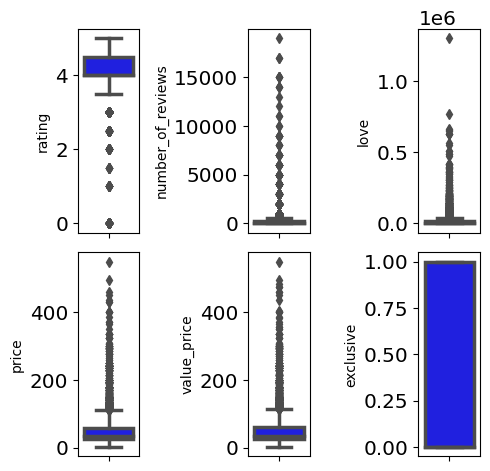

In [ ]:
# Membuat boxplot
plt.figure(figsize = (5, 7))
for col in range(0, len(nums)):
    plt.subplot(3, 3, col + 1)
    sns.boxplot(y = df[nums[col]], color = 'blue')
    plt.tight_layout()

plt.show()

**DATASET ORIGINAL DENGAN OUTLIER HANDLING (IQR METHOD)**

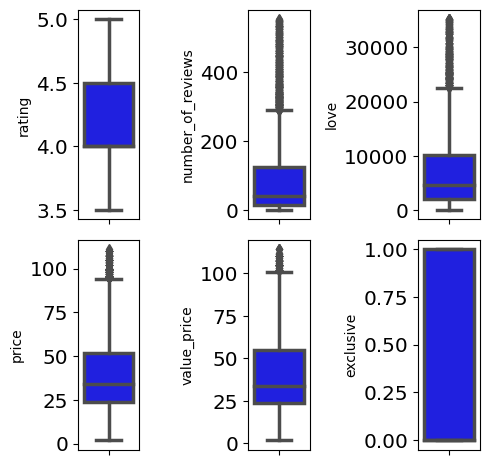

In [ ]:
# Membuat boxplot
plt.figure(figsize = (5, 7))
for col in range(0, len(nums)):
    plt.subplot(3, 3, col + 1)
    sns.boxplot(y = df2[nums[col]], color = 'blue')
    plt.tight_layout()

plt.show()

Metode IQR secara efektif melakukan handling global outlier yang tersisa, meskipun hal ini menyebabkan pengurangan data sebesar 30%. Mengingat bahwa seluruh data dengan fitur numerical memiliki skewed distribution dan memberikan akurasi yang lebih baik dalam outlier reduction, metode ini terbukti lebih baik dalam menghilangkan outlier. Oleh karena itu, kami akan mengadopsi metode IQR sebagai pendekatan utama untuk handling outlier dalam dataset ini.

In [ ]:
# Implementasi methode IQR pada dataset original
print(f"Jumlah baris sebelum outlier handling: {len(df)}")

filtered_entries = np.array([True] * len(df))

for i in nums:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)

    filtered_entries = ((df[i] >= low_limit) & (df[i] <= high_limit)) & filtered_entries

df = df[filtered_entries]
print(f"Jumlah baris setelah outlier handling (IQR method): {len(df)}")

Jumlah baris sebelum outlier handling: 7983
Jumlah baris setelah outlier handling (IQR method): 5537


### Feature Transformation

### Log Transformation

Kita akan kembali memeriksa plot KDE dan summary statistics dari setiap fitur numerik untuk melihat fitur mana yang perlu dilakukan transformasi log

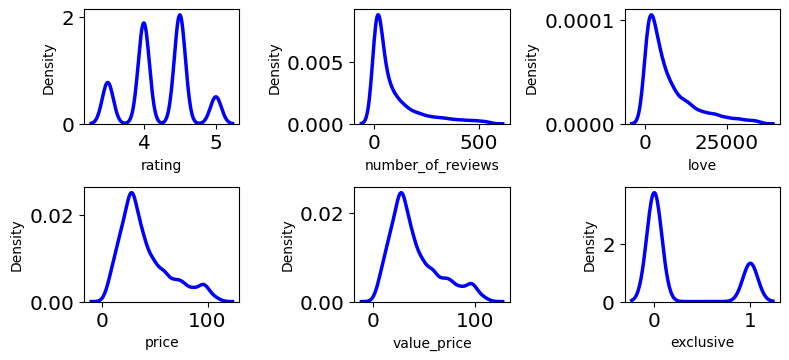

In [ ]:
# Membuat KDE Plot
plt.figure(figsize = (8, 5))
for col in range(0, len(nums)):
    plt.subplot(3, 3, col + 1)
    sns.kdeplot(x = df2[nums[col]], color = 'blue')
    plt.tight_layout()

plt.show()

In [ ]:
# Checking the summary statistics
df.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,5.537000e+03,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000
mean,1.930731e+06,4.218620,92.591656,7330.238035,40.232081,40.889567,0.260249
std,3.638822e+05,0.429265,117.228334,7444.544091,23.693391,24.138150,0.438810
min,5.000000e+01,3.500000,1.000000,0.000000,2.000000,2.000000,0.000000
25%,1.788587e+06,4.000000,14.000000,2000.000000,24.000000,24.000000,0.000000
50%,2.038297e+06,4.000000,42.000000,4600.000000,34.000000,34.000000,0.000000
75%,2.187607e+06,4.500000,124.000000,10200.000000,52.000000,55.000000,1.000000
max,2.293793e+06,5.000000,552.000000,35200.000000,111.000000,114.000000,1.000000


Berikut adalah strategi yang dapat dilakukan:
1. `number_of_reviews`, `price`, dan `value_price` memiliki bentuk distribusi right-skewed, kita dapat menghilangkan skewness data dengan melakukan transformasi log
2. `love` memiliki nilai nol, transformasi log tidak akan dapat digunakan secara optimal, alternatif yang lebih baik adalah Power Transformation dengan metode Yeo-Johnson, tetapi karena konsep itu sendiri belum pernah diajarkan, kita akan menggunakan normalization.

Sebelum transformasi log untuk kolom `number_of_reviews`, `price`, dan `value_price`, mari kita lihat efek pada distribusinya setelah transformasi log

*Catatan: Standardisasi hanya akan bekerja optimal jika data berdistribusi mendekati normal*

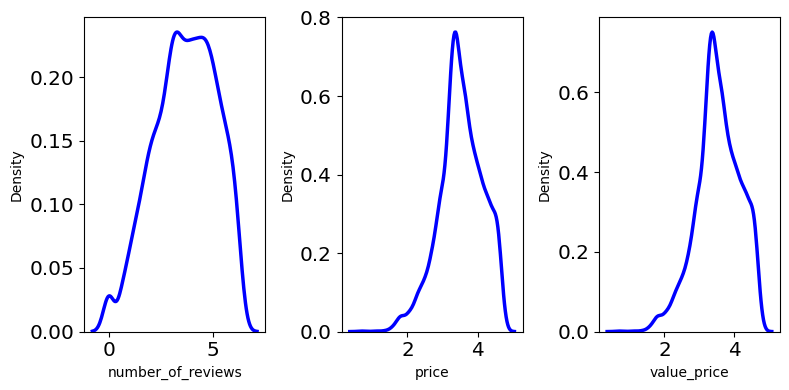

In [ ]:
# KDE plot untuk kolom `number_of_reviews`, `price`, and `value_price` setelah transformasi log
log_transform = ['number_of_reviews', 'price', 'value_price']

plt.figure(figsize = (8, 4))
for col in range(0, len(log_transform)):
    plt.subplot(1, 3, col + 1)
    sns.kdeplot(np.log(df[log_transform[col]]), color = 'blue')
    plt.tight_layout()

In [ ]:
# Mengimplementasi log transformation pada data original
log_transform = ['number_of_reviews', 'price', 'value_price']

for col in log_transform:
    df[col] = np.log(df[col])

df[log_transform].describe()

<ipython-input-35-ca1366dedf72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log(df[col])


,number_of_reviews,price,value_price
count,5537.000000,5537.000000,5537.000000
mean,3.658638,3.518186,3.532130
std,1.474263,0.616884,0.621863
min,0.000000,0.693147,0.693147
25%,2.639057,3.178054,3.178054
50%,3.737670,3.526361,3.526361
75%,4.820282,3.951244,4.007333
max,6.313548,4.709530,4.736198


### Normalization

Kolom `love` memiliki nilai nol, log transform tidak akan bekerja secara optimal, kita akan menggunakan normalisasi sebagai gantinya karena datanya berdistribusi right-skewed

Sebagai tambahan, kita akan rescaling seluruh feature numerical menggunakan normalization juga

In [ ]:
# Memilih seluruh fitur numerical kecuali target
minmax = nums[:-1]

# Normalisasi dengan MinMaxScaler
for i in minmax:
  df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df), 1))

# Mengecek summary statistics dari kolom `love` yang telah di-normalisasi
df[minmax].describe()

<ipython-input-36-51d8a0dace95>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df), 1))
<ipython-input-36-51d8a0dace95>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = MinMaxScaler().fit_transform(df[i].values.reshape(len(df), 1))
<ipython-input-36-51d8a0dace95>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,rating,number_of_reviews,love,price,value_price
count,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000
mean,0.479080,0.579490,0.208245,0.703379,0.702188
std,0.286177,0.233508,0.211493,0.153592,0.153810
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.417999,0.056818,0.618693,0.614612
50%,0.333333,0.592008,0.130682,0.705414,0.700761
75%,0.666667,0.763482,0.289773,0.811202,0.819724
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Encoding

Pertama, mari kita periksa berapa banyak nilai unik yang dimiliki oleh setiap fitur categorical

In [ ]:
print(f'Ada sejumlah {len(df[cats[0]].unique())} unique values pada fitur {cats[0]}')
print(f'Ada sejumlah {len(df[cats[1]].unique())} unique values pada fitur {cats[1]}')

Ada sejumlah 299 unique values pada fitur brand
Ada sejumlah 139 unique values pada fitur category


Kedua fitur kategorikal `brand` dan `category` memiliki kardinalitas yang tinggi sehingga harus dilakukan binning untuk mengurangi kardinalitas. Pada homework ini, kita dapat membiarkan 20 nilai unik pertama dengan frekuensi tertinggi dan mengkategorikan sisanya ke dalam "Others"

In [ ]:
# Membuat top_20_brand
top_20_brand = df['brand'].value_counts().nlargest(20).index

# Recode value 'Others' untuk fitur `category`
df['brand'] = df['brand'].apply(lambda x : x if x in top_20_brand else 'Others')

<ipython-input-38-ab8edc3e589b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['brand'].apply(lambda x : x if x in top_20_brand else 'Others')


In [ ]:
# Membuat top_20_category
top_20_category = df['category'].value_counts().nlargest(20).index

# Recode value 'Others' untuk fitur `category`
df['category'] = df['category'].apply(lambda x : x if x in top_20_category else 'Others')

<ipython-input-39-b35e69859348>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].apply(lambda x : x if x in top_20_category else 'Others')


Sekarang mari kita cek berapa nilai unik yang ada dalam fitur `brand` dan `category`

In [ ]:
print(f'Ada sejumlah {len(df[cats[0]].unique())} unique values pada fitur {cats[0]}')
print(f'Ada sejumlah {len(df[cats[1]].unique())} unique values pada fitur {cats[1]}')

Ada sejumlah 21 unique values pada fitur brand
Ada sejumlah 21 unique values pada fitur category


In [ ]:
for col in cats:
    print(f'jumlah nilai unik pada fitur {col}')
    print(df[col].value_counts())
    print('----' * 10, '\n')

jumlah nilai unik pada fitur brand
Others                3863
SEPHORA COLLECTION     344
CLINIQUE               146
Kiehl's Since 1851     105
Dior                    84
TOM FORD                82
Kérastase               75
Fresh                   74
Bumble and bumble       74
tarte                   73
Moroccanoil             68
Lancôme                 66
philosophy              63
MAKE UP FOR EVER        63
Shiseido                61
Estée Lauder            56
Bobbi Brown             50
Origins                 50
Peter Thomas Roth       47
Clarins                 47
Benefit Cosmetics       46
Name: brand, dtype: int64
---------------------------------------- 

jumlah nilai unik pada fitur category
Others                       2614
Perfume                       338
Moisturizers                  270
Face Serums                   214
Rollerballs & Travel Size     195
Hair Styling Products         180
Face Wash & Cleansers         175
Value & Gift Sets             155
Face Masks         

Untuk fitur dengan lebih dari 2 nilai unik dan tidak memiliki natural ordering (ordinality), metode one hot encoding (OHE) direkomendasikan. Meskipun telah mengurangi kardinalitas dari lebih dari 100 menjadi 21, OHE yang dihasilkan masih akan menghasilkan banyak fitur tambahan (sekitar 42 fitur tambahan dengan masing-masing 21 nilai unik). Karena alternatif metode feature encoding selain Label Encoding dan OHE belum diajarkan, OHE akan digunakan untuk homework ini.

In [ ]:
# Implementasi OHE
for col in cats:
    ohe = pd.get_dummies(df[col], prefix = col)
    df = df.join(ohe)

# Menghapus kolom 'brand' dan 'category'
df.drop(columns = ['brand', 'category'], inplace = True)

# Mengecek dataset setelah OHE
df.sample(2)

,id,rating,number_of_reviews,love,price,value_price,exclusive,brand_Benefit Cosmetics,brand_Bobbi Brown,brand_Bumble and bumble,...,category_Hair Styling Products,category_Highlighter,category_Lipstick,category_Lotions & Oils,category_Moisturizers,category_Others,category_Perfume,category_Rollerballs & Travel Size,category_Shampoo,category_Value & Gift Sets
2311,1820414,0.0,0.609823,0.167614,0.547065,0.543457,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1316,1638220,0.0,0.681719,0.142045,0.484493,0.481297,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Class Imbalance Handling

Kita perlu memeriksa proporsi antara produk eksklusif dan non-eksklusif terlebih dahulu.

In [ ]:
# Dalam persentase (%)
round(df['exclusive'].value_counts(normalize = True)*100, 2)

0    73.98
1    26.02
Name: exclusive, dtype: float64

Ada mild imbalance dalam proporsi mayoritas dan minoritas pada target, `exclusive` di mana produk eksklusif hanya terdiri dari ~26% dari data. Mari kita buat kolom boolean flag yang mengindikasikan apakah produk tersebut eksklusif atau tidak.

In [ ]:
# Membuat kolom boolean flag
df['exclusive_class'] = df['exclusive'] == 1

# Menghitung jumlah mayoritas vs. minoritas dalam target
df['exclusive_class'].value_counts()

False    4096
True     1441
Name: exclusive_class, dtype: int64

In [ ]:
# Memisahkan antara fitur dan target
X = df[[col for col in df.columns if (df[col].dtype != 'object') and col not in ['exclusive_class', 'exclusive']]]
y = df['exclusive_class'].values

print(X.shape)
print(y.shape)

(5537, 48)
(5537,)


Dalam dataset ini, kita kehilangan beberapa proporsi data saat outlier handling. Jadi, kita akan memilih untuk menambahkan lebih banyak data dari kelas minoritas daripada mengurangi data dari kelas mayoritas. Kita memiliki dua opsi untuk ini: ROS (Random Over Sampling) dan SMOTE (Synthetic Minority Over Sampling). Pilihan terbaik di antara keduanya akan bergantung pada model yang kita gunakan, yang akan kita uji nanti. Namun, untuk saat ini, kita akan menggunakan SMOTE karena kita belum memutuskan model yang akan digunakan.

In [ ]:
# Implementasi SMOTE
X_smote, y_smote = over_sampling.SMOTE(sampling_strategy = 0.6).fit_resample(X, y)

# Perbandingan antara proporsi target original dan SMOTE
print('Komposisi Original Target')
print(pd.Series(y).value_counts())

print('\nKomposisi SMOTE Target')
print(pd.Series(y_smote).value_counts())

Komposisi Original Target
False    4096
True     1441
dtype: int64

Komposisi SMOTE Target
False    4096
True     2457
dtype: int64


## **No 5: Feature Engineering**

Cek feature yang ada sekarang, lalu lakukan:

1. Feature selection (membuang feature yang kurang relevan atau redundan)
2. Feature extraction (membuat feature baru dari feature yang sudah ada)
3. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

*Untuk subnomor 1 & 2, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)*

**A. Feature Selection**

In [ ]:
# Write here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537 entries, 0 to 7998
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5537 non-null   int64  
 1   rating                              5537 non-null   float64
 2   number_of_reviews                   5537 non-null   float64
 3   love                                5537 non-null   float64
 4   price                               5537 non-null   float64
 5   value_price                         5537 non-null   float64
 6   exclusive                           5537 non-null   int64  
 7   brand_Benefit Cosmetics             5537 non-null   uint8  
 8   brand_Bobbi Brown                   5537 non-null   uint8  
 9   brand_Bumble and bumble             5537 non-null   uint8  
 10  brand_CLINIQUE                      5537 non-null   uint8  
 11  brand_Clarins                       5537 no

Fitur-fitur ini sudah berbentuk biner atau kategorikal,sehingga menurut kami mungkin tidak selalu perlu melakukan ekstraksi fitur lanjutan.

Analisa korelasi antar feature mengunakan heatmap untuk melihat apakah ada yang rebundant sehingga dapat di drop dari dataframe

<Axes: >

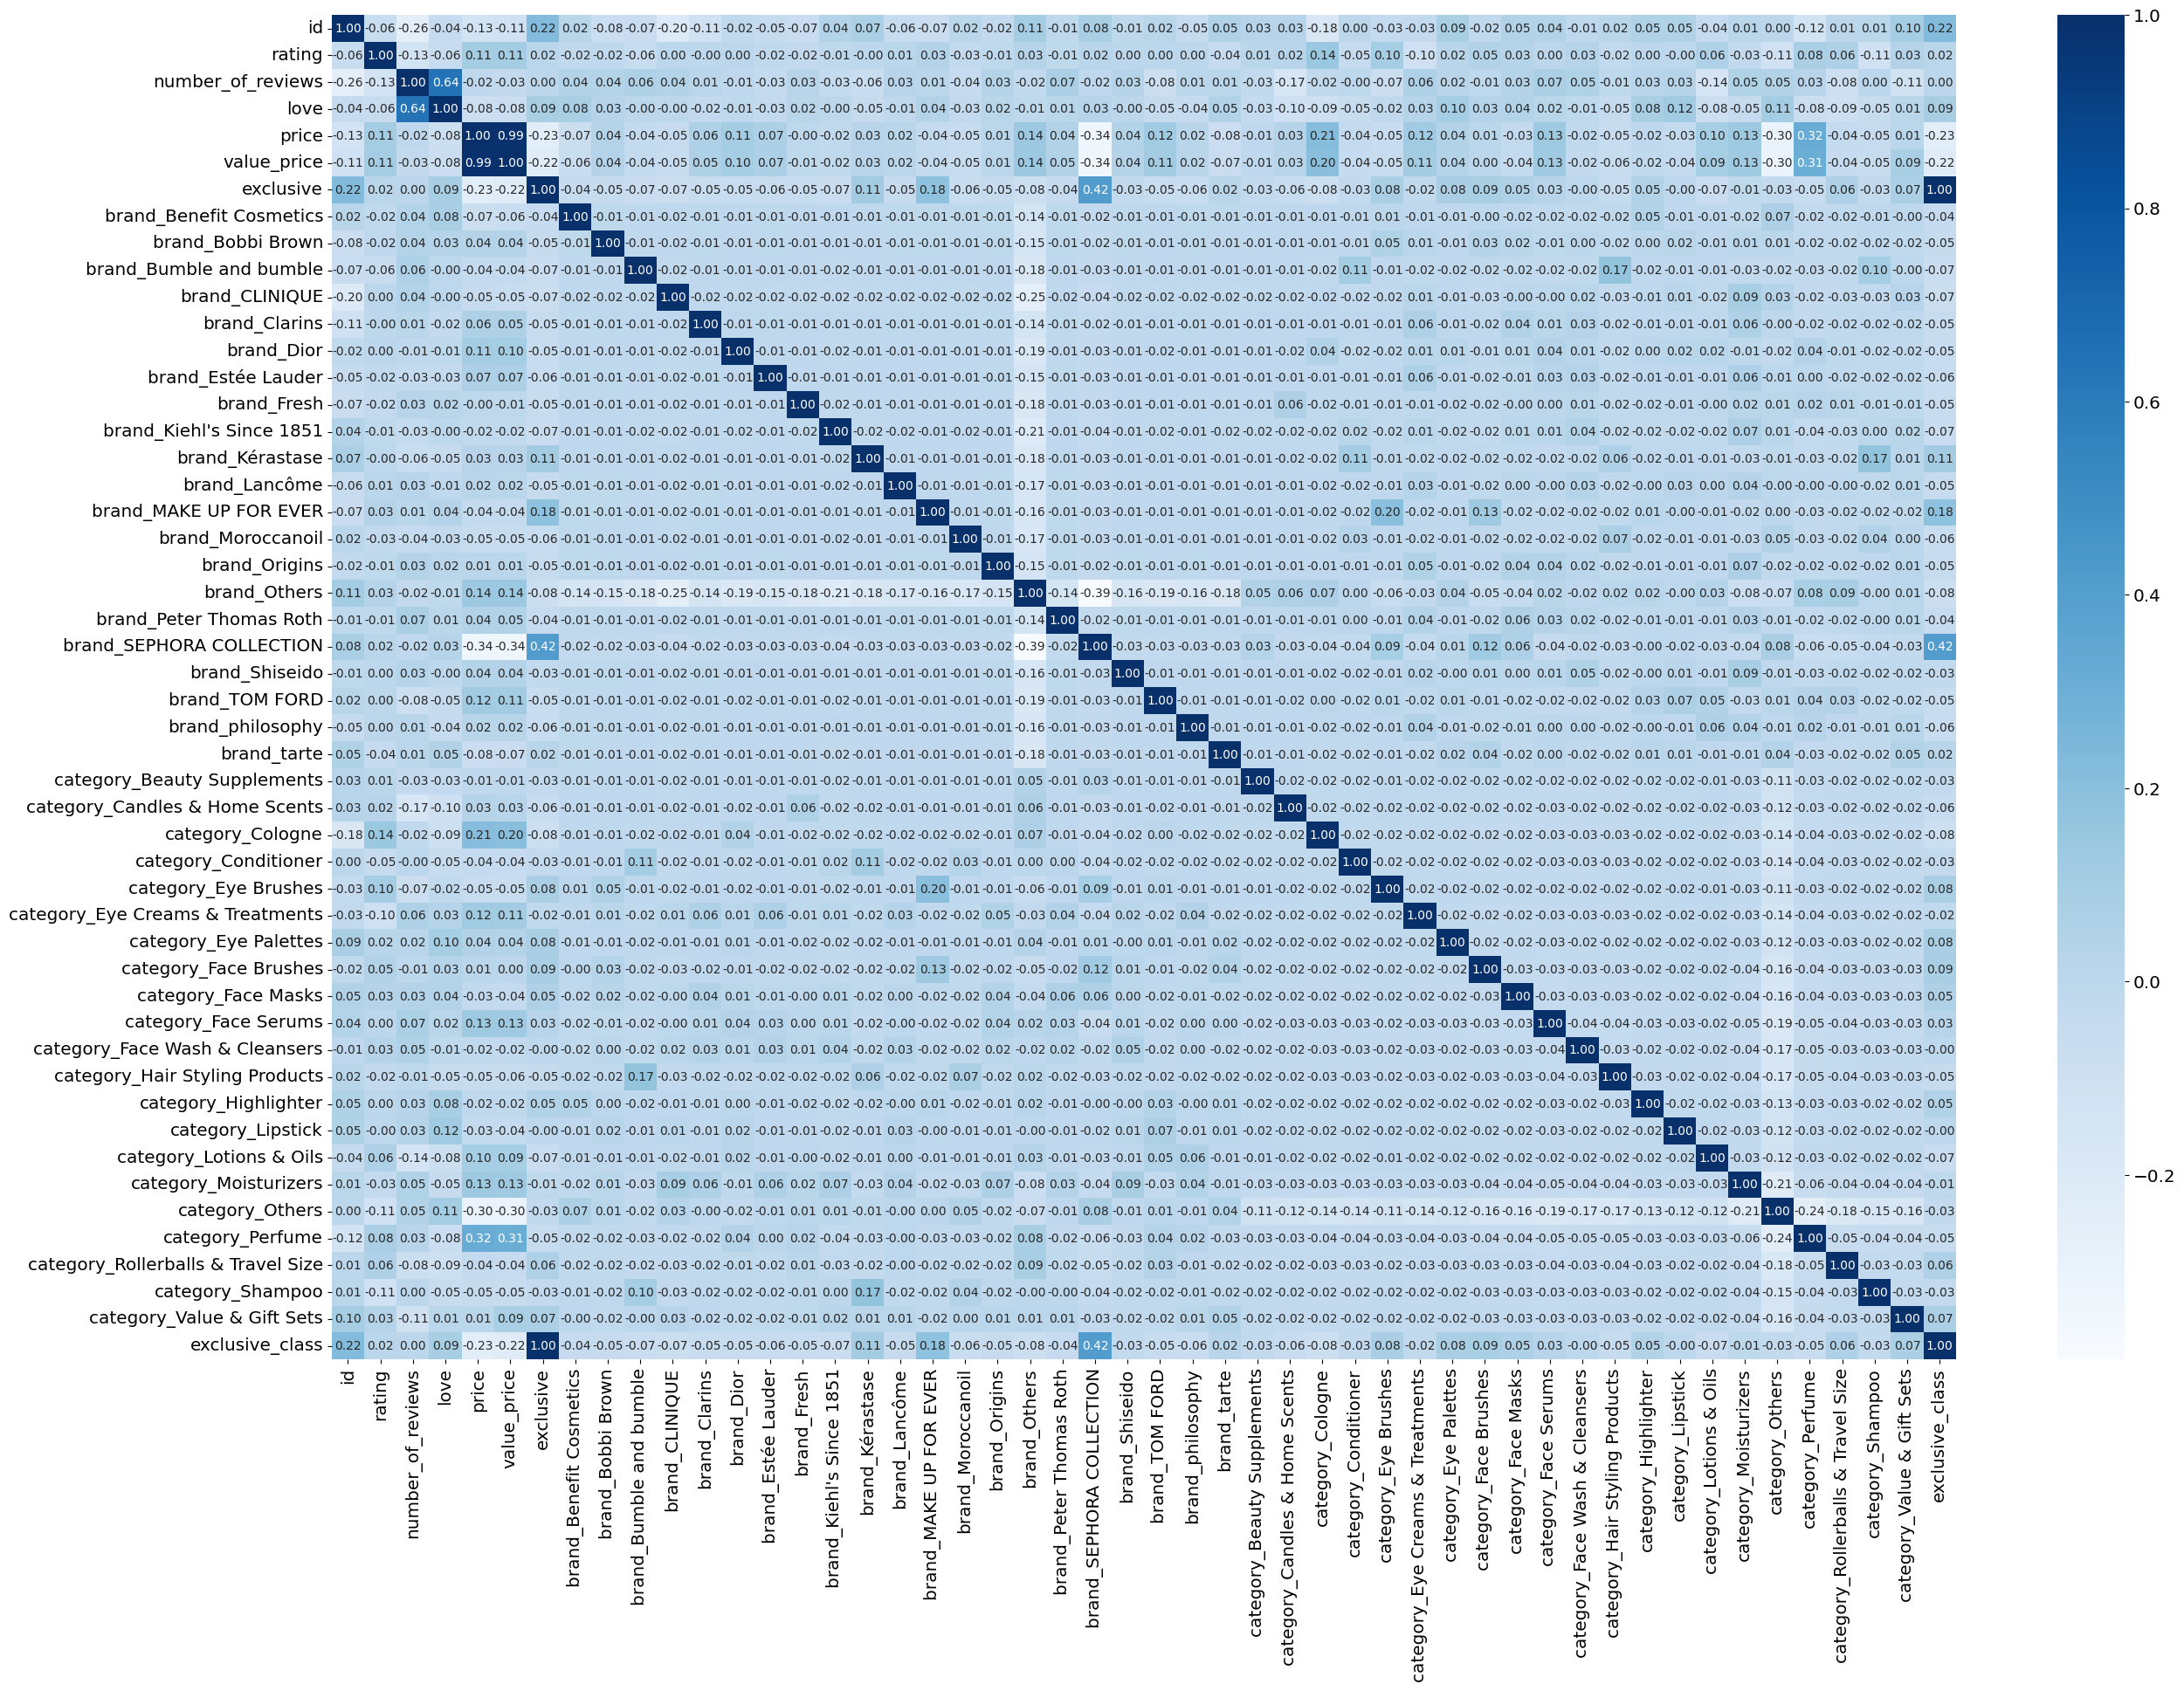

In [ ]:
# Menggunakan pair plot untuk melihat hubungan antar fitur dan target
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), cmap='Blues', annot = True, fmt =".2f")

Akibat data yang terlalu banyak kami membuat program untuk menentukan feature apa yang redundant, walaupun memang dapat dilihat secara langsung

In [ ]:
# Metode ini saya cari di sumber luar walau memang belum diajarkan dan sebenarnya untuk mengetahui rebundant dapat dilihat secara langsung di heatmap
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menghitung VIF untuk setiap fitur numerik
X_numerical = df.select_dtypes(include=['float64', 'int64'])
vif_data = pd.DataFrame()
vif_data["feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]

high_vif_features = vif_data[vif_data["VIF"] > 7]

print("Fitur dengan VIF yang tinggi:")
print(high_vif_features)

Fitur dengan VIF yang tinggi:
             feature          VIF
0                 id    14.299217
2  number_of_reviews    10.601297
4              price  1067.929527
5        value_price  1058.880950


Berdasarkan analisa pada heatmap, ada beberapa fitur yang berkorelasi dengan fitur lain dan menyebabkan multikolinearitas, yaitu:
1. `class` dan `exclusive_class`
2. `price` dan `value_price`
3. `number_of_reviews` dan `love`

Kita drop fitur yang memiliki korelasi lebih lemah pada target, yaitu:
1. `number_of_reviews`

Kita juga drop fitur yang tidak dibutuhkan (karena berupa ID, alasan flagging, atau kolom yang serupa dengan nilai statistik yang sama)
1. `exclusive_class`
2. `value_price`
3. `id`


In [ ]:
drop_columns = ["id", "exclusive_class", "value_price", "number_of_reviews"]
X = df.drop(drop_columns, axis = 1)

**B. Feature Extraction**

Menurut kami tidak selalu dibutuhkan ekstraksi fitur khususnya dalam konteks dataset ini karena fitur-fitur yang ada sudah bersifat kategorikal dan tidak dapat diturunkan lebih jauh lagi

**C. Ide Fitur Tambahan Diluar Dataset**
1. `holiday_season` = Fitur yang berupa penanda biner atau seperti boolean yang menunjukkan apakah produk dibeli selama musim liburan atau perayaan tertentu, seperti Natal, Tahun Baru, Black Friday, dll,

Nilai:
- 1 (produk dibeli selama holiday season)
- 0 (produk dibeli di luar holiday season).

Alasan: Selama musim liburan dan perayaan, pola pembelian dan preferensi pelanggan seringkali berubah. Orang mungkin lebih cenderung membeli produk-produk eksklusif sebagai hadiah atau untuk perayaan khusus.

Keterkaitan: Fitur ini dapat dihubungkan dengan kolom rating, number_of_reviews, price, dan fitur-fitur lainnya yang berkaitan dengan performa produk

2. `stock_availibility` = Fitur ini dapat berupa penanda biner seperti boolean yang menunjukkan apakah produk tersedia atau kehabisan stok pada saat pembelian.

Nilai:

- Numerical (Jumlah produk yang masih tersedia)

Alasan: Produk eksklusif biasanya memiliki stok yang lebih sedikit (limited-edition) daripada non-eksklusif

Keterkaitan: Fitur ini dapat dihubungkan dengan kolom rating, number_of_reviews, price, dan fitur-fitur lainnya yang berkaitan dengan performa produk.

3. `special_offer_availibility` = Fitur ini adalah penanda biner seperti boolean
yang mengindikasikan apakah produk memiliki penawaran khusus saat pembelian.

Nilai:
- 1 (produk memiliki penawaran khusus)
- 0 (produk tidak memiliki penawaran khusus).

Alasan: Penawaran khusus memiliki potensi untuk secara signifikan memengaruhi keputusan pembelian pelanggan dan persepsi mereka terhadap produk. Produk eksklusif mungkin saja lebih jarang memiliki penawaran khusus.

Keterkaitan: Fitur ini dapat dihubungkan dengan kolom rating, number_of_reviews, price, dan atribut-atribut lain yang memengaruhi performa produk.

4. `social_media_engagement_score` = Fitur ini akan berupa skor numerik yang mencerminkan tingkat keterlibatan atau interaksi produk dengan pelanggan di platform media sosial.

Nilai:
- Skor numerik yang dapat bervariasi (like,comment,share) sesuai dengan metrik yang digunakan untuk menghitung keterlibatan.

Alasan: Keterlibatan di media sosial adalah indikator penting dalam mengukur sejauh mana produk Anda menarik perhatian pelanggan dan menciptakan ikatan dengan mereka. Asumsinya adalah brand eksklusif memiliki engagement score yang lebih tinggi.

Keterkaitan: Fitur ini dapat dihubungkan dengan kolom rating, number_of_reviews, price, serta atribut-atribut lain yang berdampak pada performa produk.

In [ ]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)